In [503]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [264]:
data = pd.read_csv('https://raw.githubusercontent.com/antovich/PyTrackingFinalProject/master/VSTM%20Data%20P18.txt', sep= "\t",)

In [266]:

xcoor = data['GazePointX (MCSpx)'] 
ycoor = data['GazePointY (MCSpx)'] 
subs = data['ParticipantName']
time = data['RecordingTimestamp']
stim = data['MediaName']

In [516]:
def GazeData(AOIOneCoor, AOITwoCoor, xcoor, ycoor, subs, time, stim):
    #the AOI variables expect a list of length 4: xmin, ymin, xmax, ymax
    AOIOneXmin = AOIOneCoor[0] 
    AOIOneYmin = AOIOneCoor[1] 
    AOIOneXmax = AOIOneCoor[2] 
    AOIOneYmax = AOIOneCoor[3]

    AOITwoXmin = AOIOneCoor[0] 
    AOITwoYmin = AOIOneCoor[1]  
    AOITwoXmax = AOIOneCoor[2]  
    AOITwoYmax = AOIOneCoor[3] 

    trialNum = []
    trialList = []
    trialLen = []
    curstim = []
    subList = []
    gazedur1 = []
    gazedur2 = []
    for subID in set(subs):
        #get index of trial changes, based on change in stim name, 'MediaName' variable
        trials = np.roll(stim[subs == subID],1)!=stim[subs == subID] # onset of change in trial
        trialsOFF = np.roll(stim[subs == subID],-1)!=stim[subs == subID] # offset of change in trial
        trialLen.extend(np.subtract(time[subs == subID][trialsOFF], time[subs == subID][trials]))# build list of trial lengths for output dataframe
        trialNum.extend(trials.cumsum()) #get trial number by increasing trial number each time a new trial onset is found
        trialList.extend(np.unique(trialNum)) # build list of trials by subject for output dataframe
        subList.extend([subID]*len(trialList)) # build list of subjects for output dataframe

        for Trial in np.unique(trialNum):

            # Get onset/offset of gaze event changes for current subject and trial for AOIOne
            eventON1 = np.roll(AOIOne[subs == subID][trialNum == Trial],1) != AOIOne[subs == subID][trialNum == Trial]
            eventOFF1 = np.roll(AOIOne[subs == subID][trialNum == Trial],-1) != AOIOne[subs == subID][trialNum == Trial]

            # Get onset/offset of gaze event changes for current subject and trial for AOITwo
            eventON2 = np.roll(AOITwo[subs == subID][trialNum == Trial],1) != AOITwo[subs == subID][trialNum == Trial]
            eventOFF2 = np.roll(AOITwo[subs == subID][trialNum == Trial],-1) != AOITwo[subs == subID][trialNum == Trial]

            curstim.append(np.array(stim[subs == subID][trialNum == Trial])[0]) # build list of stimulus name for output dataframe

            # Get the difference between the gaze event onset and offset values in the timestamp, to get the total duration of gaze event, then sum up these events for the trial
            gazedur1.append(np.subtract(time[subs == subID][trialNum == Trial][AOIOne == True][eventOFF1], time[subs == subID][trialNum == Trial][AOIOne == True][eventON1]).sum())
            # Get the difference between the gaze event onset and offset values in the timestamp, to get the total duration of gaze event, then sum up these events for the trial
            gazedur2.append(np.subtract(time[subs == subID][trialNum == Trial][AOITwo == True][eventOFF2], time[subs == subID][trialNum == Trial][AOITwo == True][eventON2]).sum())
    
    # Build data frame from lists created in for loops
    outputDF = pd.DataFrame({'Subject': subList,
                             'Trial': trialList,
                             'TrialDuration_ms': trialLen,
                             'Stimulus': curstim,
                             'AOI_One_ms': gazedur1,
                             'AOI_Two_ms': gazedur2})
    outputDF = outputDF[['Subject','Trial', 'TrialDuration_ms','Stimulus', 'AOI_One_ms', 'AOI_Two_ms']]

In [267]:

give AOI coordinates (these are determined from the image, uploaded to a pixel coordinate mapper: http://nicodjimenez.github.io/boxLabel/annotate.html)

AOIOneXmin = 204 
AOIOneYmin = 208 
AOIOneXmax = 594 
AOIOneYmax = 561

AOITwoXmin = 777
AOITwoYmin = 208 
AOITwoXmax = 1167 
AOITwoYmax = 561

# create mask for AOI hits based on dimensions above
AOIOne = (AOIOneXmin <= xcoor) & (xcoor <= AOIOneXmax) & (AOIOneYmin <= ycoor) & (ycoor <= AOIOneYmax)
AOITwo = (AOITwoXmin <= xcoor) & (xcoor <= AOITwoXmax) & (AOITwoYmin <= ycoor) & (ycoor <= AOITwoYmax)


In [ ]:
df = GazeData(AOIOneCoor = [204, 208, 594, 561], AOITwoCoor = [777, 208, 1167, 561], xcoor = data['GazePointX (MCSpx)'], ycoor = data['GazePointY (MCSpx)'], subs = data['ParticipantName'], time = data['RecordingTimestamp'], stim = data['MediaName']) 

AOITwoXmin = 
AOITwoYmin = 208 
AOITwoXmax = 1167 
AOITwoYmax = 561, AOITwoCoor, xcoor, ycoor, subs, time, stim)

In [436]:
# Get total duration of looks to both AOIs by subject, trial, and stimulus name
trialNum = []
trialList = []
trialLen = []
curstim = []
subList = []
gazedur1 = []
gazedur2 = []
for subID in set(subs):
    #get index of trial changes, based on change in stim name, 'MediaName' variable
    trials = np.roll(stim[subs == subID],1)!=stim[subs == subID] # onset of change in trial
    trialsOFF = np.roll(stim[subs == subID],-1)!=stim[subs == subID] # offset of change in trial
    trialLen.extend(np.subtract(time[subs == subID][trialsOFF], time[subs == subID][trials]))# build list of trial lengths for output dataframe
    trialNum.extend(trials.cumsum()) #get trial number by increasing trial number each time a new trial onset is found
    trialList.extend(np.unique(trialNum)) # build list of trials by subject for output dataframe
    subList.extend([subID]*len(trialList)) # build list of subjects for output dataframe
    
    for Trial in np.unique(trialNum):
        
        # Get onset/offset of gaze event changes for current subject and trial for AOIOne
        eventON1 = np.roll(AOIOne[subs == subID][trialNum == Trial],1) != AOIOne[subs == subID][trialNum == Trial]
        eventOFF1 = np.roll(AOIOne[subs == subID][trialNum == Trial],-1) != AOIOne[subs == subID][trialNum == Trial]
        
        # Get onset/offset of gaze event changes for current subject and trial for AOITwo
        eventON2 = np.roll(AOITwo[subs == subID][trialNum == Trial],1) != AOITwo[subs == subID][trialNum == Trial]
        eventOFF2 = np.roll(AOITwo[subs == subID][trialNum == Trial],-1) != AOITwo[subs == subID][trialNum == Trial]
        
        curstim.append(np.array(stim[subs == subID][trialNum == Trial])[0]) # build list of stimulus name for output dataframe
        
        # Get the difference between the gaze event onset and offset values in the timestamp, to get the total duration of gaze event, then sum up these events for the trial
        gazedur1.append(np.subtract(time[subs == subID][trialNum == Trial][AOIOne == True][eventOFF1], time[subs == subID][trialNum == Trial][AOIOne == True][eventON1]).sum())
        # Get the difference between the gaze event onset and offset values in the timestamp, to get the total duration of gaze event, then sum up these events for the trial
        gazedur2.append(np.subtract(time[subs == subID][trialNum == Trial][AOITwo == True][eventOFF2], time[subs == subID][trialNum == Trial][AOITwo == True][eventON2]).sum())
    

In [439]:
# create dataframe with trial num, and total AOI gaze duration for two AOIs
outputDF = pd.DataFrame({'Subject': subList,
                       'Trial': trialList,
                       'TrialDuration_ms': trialLen,
                       'Stimulus': curstim,
                       'AOI_One_ms': gazedur1,
                       'AOI_Two_ms': gazedur2})
outputDF = outputDF[['Subject','Trial', 'TrialDuration_ms','Stimulus', 'AOI_One_ms', 'AOI_Two_ms']]

In [442]:
outputSTIM = outputDF.groupby(by = "Stimulus").mean() #get mean looking time to AOIs by stimulus name
outputSUB = outputDF.groupby(by = "Subject").mean() #get mean looking time to AOIs by subject ID
outputTRIAL = outputDF.groupby(by = "Trial").mean() #get mean looking time to AOIs by trial ID

In [440]:
outputDF

,Subject,Trial,TrialDuration_ms,Stimulus,AOI_One_ms,AOI_Two_ms
0,P18,1,526.0,VSTM Green Yellow.jpg,0.0,0.0
1,P18,2,329.0,_VSTM Grey Backgound.jpg,0.0,316.0
2,P18,3,3024.0,VSTM Red Yellow.jpg,1848.0,599.0
3,P18,4,523.0,VSTM Turquoise Yellow.jpg,0.0,83.0
4,P18,5,332.0,_VSTM Grey Backgound.jpg,0.0,299.0
5,P18,6,3020.0,VSTM Turquoise Black.jpg,949.0,733.0
6,P18,7,522.0,VSTM Red Purple.jpg,0.0,0.0
7,P18,8,330.0,_VSTM Grey Backgound.jpg,0.0,118.0
8,P18,9,3020.0,VSTM Red Black.jpg,2915.0,17.0
9,P18,10,525.0,VSTM Black Turquoise.jpg,133.0,0.0


In [419]:
# save dataframe as csv file to examine for external analysis 
filename = 'PyTracking Output'
outputDF.to_csv(filename + '.csv')


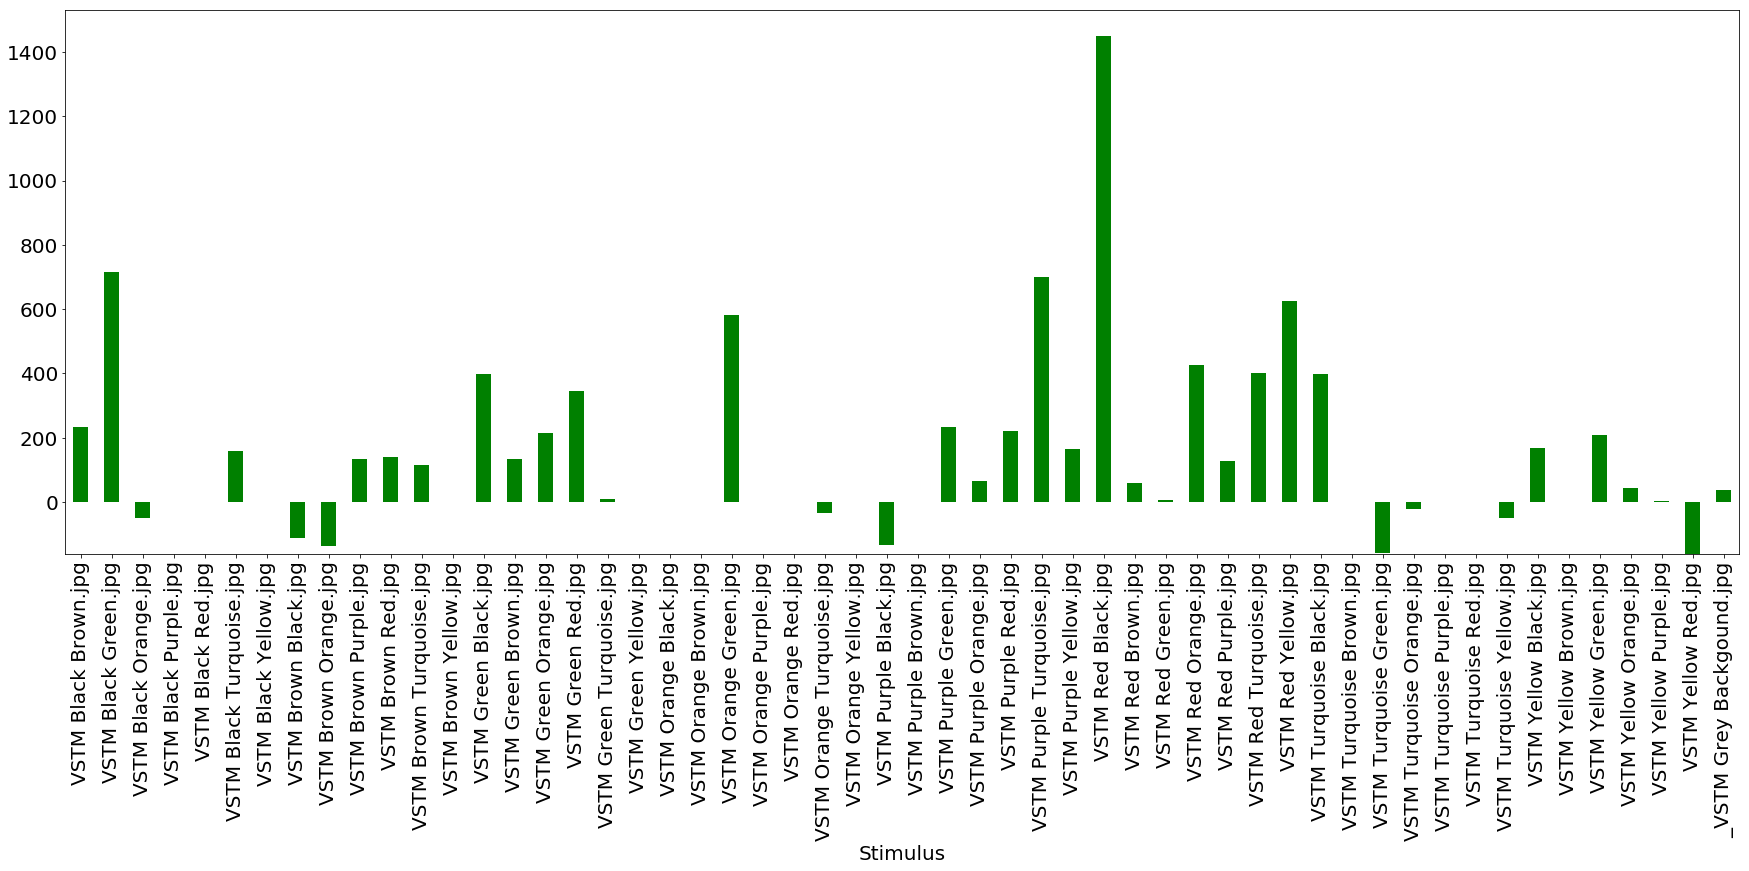

In [472]:
# proportion of looking by stimulus
outputSTIM.AOIdiff = (outputSTIM.AOI_One_ms - outputSTIM.AOI_Two_ms)
ax = outputSTIM.AOIdiff.plot(kind='bar', figsize=(30, 10), color='green')
ax.tick_params(labelsize=20)
ax.set_xlabel('Stimulus', fontsize = 20)

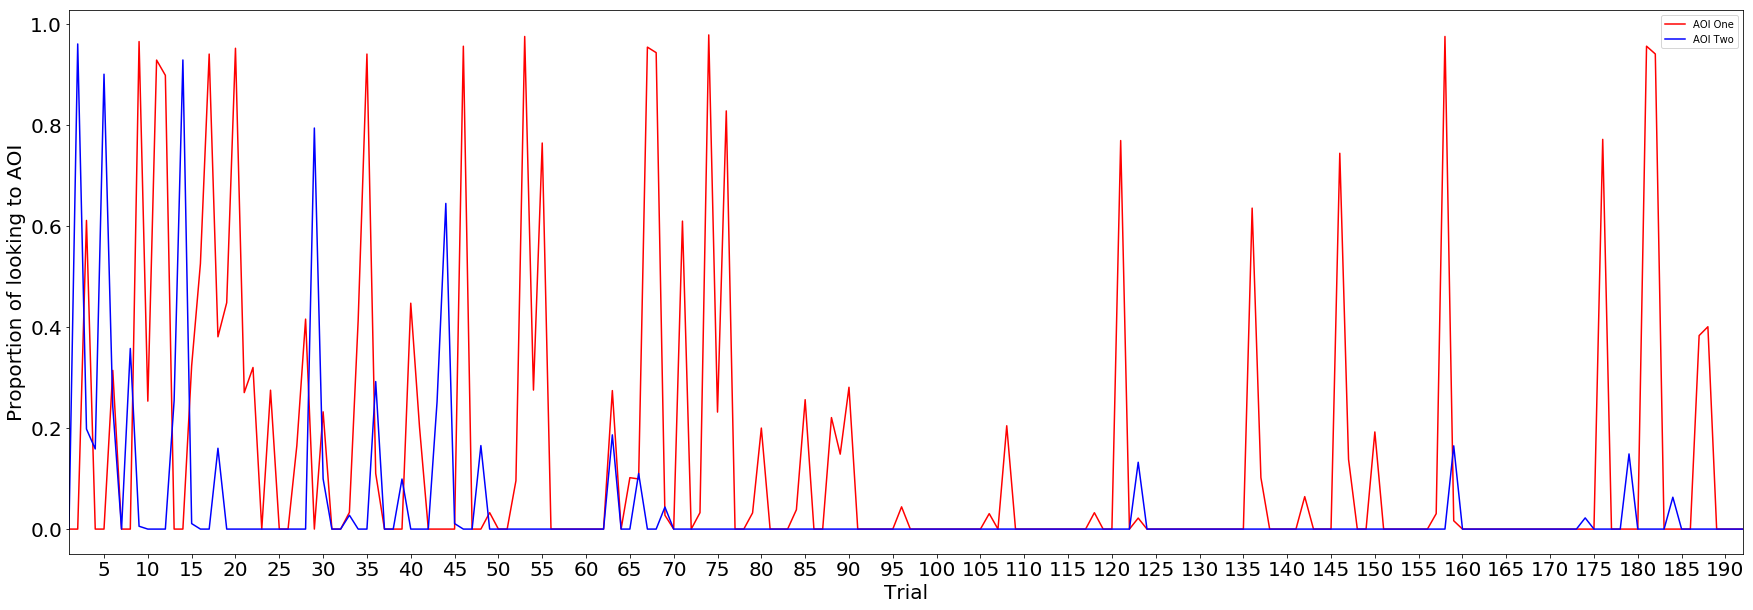

In [514]:
outputTRIAL.AOI1propLook = (outputTRIAL.AOI_One_ms/outputTRIAL.TrialDuration_ms)
outputTRIAL.AOI2propLook = (outputTRIAL.AOI_Two_ms/outputTRIAL.TrialDuration_ms)
ax = outputTRIAL.AOI1propLook.plot(color='r', figsize=(30, 10), legend = True, label = 'AOI One')
outputTRIAL.AOI2propLook.plot(color='b', legend = True, label = 'AOI Two')
tick_spacing = 5
ax.set_xlabel('Trial', fontsize = 20)
ax.set_ylabel('Proportion of looking to AOI', fontsize = 20)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(labelsize=20)
